<a href="https://colab.research.google.com/github/praveen101323/v/blob/main/ml_random_forest_(fares).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import Lasso,Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_absolute_error
from sklearn.feature_selection import VarianceThreshold
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder

In [4]:
df = pd.read_csv('/content/fares.csv')
df

,vendor_id,pickup_datetime,payment_type,fare_amount,surcharge,mta_tax,tip_amount,tolls_amount,total_amount
0,VTS,2013-01-13T10:23:00Z,CRD,8.0,0.0,0.5,2.5,0.0,11.0
1,VTS,2013-01-13T04:52:00Z,CSH,18.0,0.5,0.5,0.0,0.0,19.0
2,VTS,2013-01-13T10:47:00Z,CRD,3.5,0.0,0.5,0.7,0.0,4.7
3,VTS,2013-01-13T11:14:00Z,CRD,11.5,0.0,0.5,2.3,0.0,14.3
4,VTS,2013-01-13T11:24:00Z,CSH,6.5,0.0,0.5,0.0,0.0,7.0
...,...,...,...,...,...,...,...,...,...
49994,VTS,2013-12-03T16:46:00Z,CSH,8.5,1.0,0.5,0.0,0.0,10.0
49995,VTS,2013-12-03T17:06:00Z,CRD,10.0,1.0,0.5,3.3,0.0,14.8
49996,VTS,2013-12-06T06:53:00Z,CSH,7.5,0.0,0.5,0.0,0.0,8.0
49997,VTS,2013-12-03T16:53:00Z,CSH,14.0,1.0,0.5,0.0,0.0,15.5


<Axes: ylabel='total_amount'>

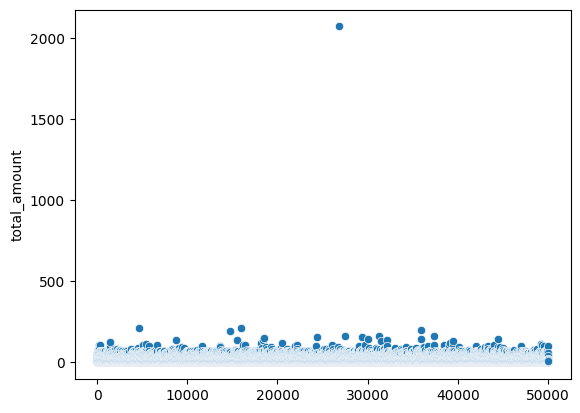

In [6]:
sns.scatterplot(df.total_amount)

<Axes: xlabel='total_amount', ylabel='Count'>

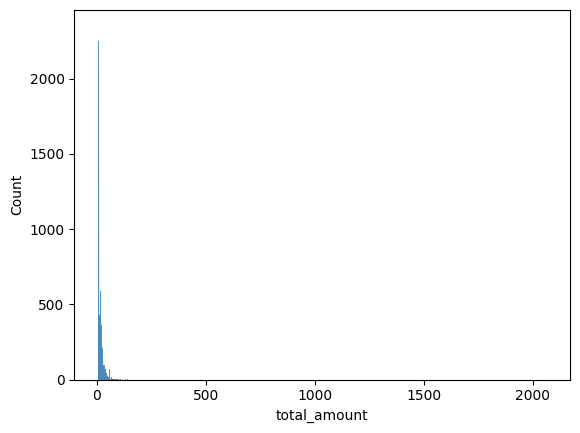

In [5]:
sns.histplot(df['total_amount'])

<Axes: ylabel='total_amount'>

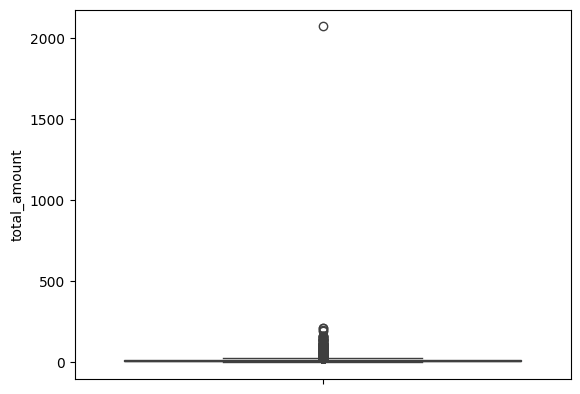

In [7]:
sns.boxplot(df.total_amount)

In [8]:
df.isnull().sum()

vendor_id          0
pickup_datetime    0
payment_type       0
fare_amount        0
surcharge          0
mta_tax            0
tip_amount         0
tolls_amount       0
total_amount       0
dtype: int64

In [9]:
q3 = df.total_amount.quantile(.75)
q1 = df.total_amount.quantile(.25)
iqr = q3-q1

lower = q1 -(1.5 * iqr)
upper = q3 + (1.5 * iqr)
print(lower,upper)

-4.75 29.25


In [10]:
df2=df[(df.total_amount>lower)&(df.total_amount<upper)]
df2

,vendor_id,pickup_datetime,payment_type,fare_amount,surcharge,mta_tax,tip_amount,tolls_amount,total_amount
0,VTS,2013-01-13T10:23:00Z,CRD,8.0,0.0,0.5,2.5,0.0,11.0
1,VTS,2013-01-13T04:52:00Z,CSH,18.0,0.5,0.5,0.0,0.0,19.0
2,VTS,2013-01-13T10:47:00Z,CRD,3.5,0.0,0.5,0.7,0.0,4.7
3,VTS,2013-01-13T11:14:00Z,CRD,11.5,0.0,0.5,2.3,0.0,14.3
4,VTS,2013-01-13T11:24:00Z,CSH,6.5,0.0,0.5,0.0,0.0,7.0
...,...,...,...,...,...,...,...,...,...
49994,VTS,2013-12-03T16:46:00Z,CSH,8.5,1.0,0.5,0.0,0.0,10.0
49995,VTS,2013-12-03T17:06:00Z,CRD,10.0,1.0,0.5,3.3,0.0,14.8
49996,VTS,2013-12-06T06:53:00Z,CSH,7.5,0.0,0.5,0.0,0.0,8.0
49997,VTS,2013-12-03T16:53:00Z,CSH,14.0,1.0,0.5,0.0,0.0,15.5


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49999 entries, 0 to 49998
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   vendor_id        49999 non-null  object 
 1   pickup_datetime  49999 non-null  object 
 2   payment_type     49999 non-null  object 
 3   fare_amount      49999 non-null  float64
 4   surcharge        49999 non-null  float64
 5   mta_tax          49999 non-null  float64
 6   tip_amount       49999 non-null  float64
 7   tolls_amount     49999 non-null  float64
 8   total_amount     49999 non-null  float64
dtypes: float64(6), object(3)
memory usage: 3.4+ MB


In [12]:
df2['pickup_datetime'] = pd.to_datetime(df2['pickup_datetime'])

<ipython-input-12-02cc1a4dd19e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['pickup_datetime'] = pd.to_datetime(df2['pickup_datetime'])


In [13]:
df2

,vendor_id,pickup_datetime,payment_type,fare_amount,surcharge,mta_tax,tip_amount,tolls_amount,total_amount
0,VTS,2013-01-13 10:23:00+00:00,CRD,8.0,0.0,0.5,2.5,0.0,11.0
1,VTS,2013-01-13 04:52:00+00:00,CSH,18.0,0.5,0.5,0.0,0.0,19.0
2,VTS,2013-01-13 10:47:00+00:00,CRD,3.5,0.0,0.5,0.7,0.0,4.7
3,VTS,2013-01-13 11:14:00+00:00,CRD,11.5,0.0,0.5,2.3,0.0,14.3
4,VTS,2013-01-13 11:24:00+00:00,CSH,6.5,0.0,0.5,0.0,0.0,7.0
...,...,...,...,...,...,...,...,...,...
49994,VTS,2013-12-03 16:46:00+00:00,CSH,8.5,1.0,0.5,0.0,0.0,10.0
49995,VTS,2013-12-03 17:06:00+00:00,CRD,10.0,1.0,0.5,3.3,0.0,14.8
49996,VTS,2013-12-06 06:53:00+00:00,CSH,7.5,0.0,0.5,0.0,0.0,8.0
49997,VTS,2013-12-03 16:53:00+00:00,CSH,14.0,1.0,0.5,0.0,0.0,15.5


In [14]:
df2['hour_of_day'] = df2['pickup_datetime'].dt.hour
df2['day_of_week'] = df2['pickup_datetime'].dt.dayofweek
df2['month'] = df2['pickup_datetime'].dt.month

<ipython-input-14-216a4fbc3485>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['hour_of_day'] = df2['pickup_datetime'].dt.hour
<ipython-input-14-216a4fbc3485>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['day_of_week'] = df2['pickup_datetime'].dt.dayofweek
<ipython-input-14-216a4fbc3485>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pyda

In [15]:
df2

,vendor_id,pickup_datetime,payment_type,fare_amount,surcharge,mta_tax,tip_amount,tolls_amount,total_amount,hour_of_day,day_of_week,month
0,VTS,2013-01-13 10:23:00+00:00,CRD,8.0,0.0,0.5,2.5,0.0,11.0,10,6,1
1,VTS,2013-01-13 04:52:00+00:00,CSH,18.0,0.5,0.5,0.0,0.0,19.0,4,6,1
2,VTS,2013-01-13 10:47:00+00:00,CRD,3.5,0.0,0.5,0.7,0.0,4.7,10,6,1
3,VTS,2013-01-13 11:14:00+00:00,CRD,11.5,0.0,0.5,2.3,0.0,14.3,11,6,1
4,VTS,2013-01-13 11:24:00+00:00,CSH,6.5,0.0,0.5,0.0,0.0,7.0,11,6,1
...,...,...,...,...,...,...,...,...,...,...,...,...
49994,VTS,2013-12-03 16:46:00+00:00,CSH,8.5,1.0,0.5,0.0,0.0,10.0,16,1,12
49995,VTS,2013-12-03 17:06:00+00:00,CRD,10.0,1.0,0.5,3.3,0.0,14.8,17,1,12
49996,VTS,2013-12-06 06:53:00+00:00,CSH,7.5,0.0,0.5,0.0,0.0,8.0,6,4,12
49997,VTS,2013-12-03 16:53:00+00:00,CSH,14.0,1.0,0.5,0.0,0.0,15.5,16,1,12


In [16]:
encoder = LabelEncoder()
df2['vendor_id'] = encoder.fit_transform(df2['vendor_id'])

<ipython-input-16-7a647e71c890>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['vendor_id'] = encoder.fit_transform(df2['vendor_id'])


In [17]:
encoder = LabelEncoder()
df2['payment_type'] = encoder.fit_transform(df2['payment_type'])

<ipython-input-17-568b7ac16974>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['payment_type'] = encoder.fit_transform(df2['payment_type'])


In [18]:
df2

,vendor_id,pickup_datetime,payment_type,fare_amount,surcharge,mta_tax,tip_amount,tolls_amount,total_amount,hour_of_day,day_of_week,month
0,1,2013-01-13 10:23:00+00:00,0,8.0,0.0,0.5,2.5,0.0,11.0,10,6,1
1,1,2013-01-13 04:52:00+00:00,1,18.0,0.5,0.5,0.0,0.0,19.0,4,6,1
2,1,2013-01-13 10:47:00+00:00,0,3.5,0.0,0.5,0.7,0.0,4.7,10,6,1
3,1,2013-01-13 11:14:00+00:00,0,11.5,0.0,0.5,2.3,0.0,14.3,11,6,1
4,1,2013-01-13 11:24:00+00:00,1,6.5,0.0,0.5,0.0,0.0,7.0,11,6,1
...,...,...,...,...,...,...,...,...,...,...,...,...
49994,1,2013-12-03 16:46:00+00:00,1,8.5,1.0,0.5,0.0,0.0,10.0,16,1,12
49995,1,2013-12-03 17:06:00+00:00,0,10.0,1.0,0.5,3.3,0.0,14.8,17,1,12
49996,1,2013-12-06 06:53:00+00:00,1,7.5,0.0,0.5,0.0,0.0,8.0,6,4,12
49997,1,2013-12-03 16:53:00+00:00,1,14.0,1.0,0.5,0.0,0.0,15.5,16,1,12


{'whiskers': [<matplotlib.lines.Line2D at 0x7fd22f6f76a0>,
 'caps': [<matplotlib.lines.Line2D at 0x7fd22f6f7be0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fd22f6f7400>],
 'medians': [<matplotlib.lines.Line2D at 0x7fd22f728160>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fd22f728400>],
 'means': []}

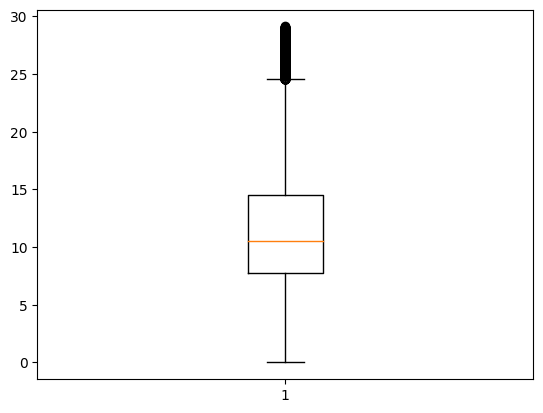

In [19]:
plt.boxplot(df2.total_amount)

In [20]:
df3= df2.select_dtypes('number')
df3

,vendor_id,payment_type,fare_amount,surcharge,mta_tax,tip_amount,tolls_amount,total_amount,hour_of_day,day_of_week,month
0,1,0,8.0,0.0,0.5,2.5,0.0,11.0,10,6,1
1,1,1,18.0,0.5,0.5,0.0,0.0,19.0,4,6,1
2,1,0,3.5,0.0,0.5,0.7,0.0,4.7,10,6,1
3,1,0,11.5,0.0,0.5,2.3,0.0,14.3,11,6,1
4,1,1,6.5,0.0,0.5,0.0,0.0,7.0,11,6,1
...,...,...,...,...,...,...,...,...,...,...,...
49994,1,1,8.5,1.0,0.5,0.0,0.0,10.0,16,1,12
49995,1,0,10.0,1.0,0.5,3.3,0.0,14.8,17,1,12
49996,1,1,7.5,0.0,0.5,0.0,0.0,8.0,6,4,12
49997,1,1,14.0,1.0,0.5,0.0,0.0,15.5,16,1,12


In [21]:
df3.corr()

,vendor_id,payment_type,fare_amount,surcharge,mta_tax,tip_amount,tolls_amount,total_amount,hour_of_day,day_of_week,month
vendor_id,1.000000,-0.012920,0.007634,0.008231,0.005246,-0.001971,0.002444,0.007048,0.019331,-0.004083,0.007036
payment_type,-0.012920,1.000000,-0.074937,-0.024240,-0.003294,-0.738112,0.007969,-0.241025,-0.016357,0.018072,-0.008820
fare_amount,0.007634,-0.074937,1.000000,0.019333,-0.027456,0.328893,0.060971,0.970648,-0.020590,0.015102,0.033307
surcharge,0.008231,-0.024240,0.019333,1.000000,0.013002,0.048660,0.011276,0.097168,0.317860,-0.132872,-0.007874
mta_tax,0.005246,-0.003294,-0.027456,0.013002,1.000000,-0.000027,0.001391,-0.020949,0.006091,0.000555,-0.001018
tip_amount,-0.001971,-0.738112,0.328893,0.048660,-0.000027,1.000000,0.019469,0.531443,0.027824,-0.017947,0.015459
tolls_amount,0.002444,0.007969,0.060971,0.011276,0.001391,0.019469,1.000000,0.111145,0.000742,0.008769,0.005568
total_amount,0.007048,-0.241025,0.970648,0.097168,-0.020949,0.531443,0.111145,1.000000,0.009888,0.000652,0.033012
hour_of_day,0.019331,-0.016357,-0.020590,0.317860,0.006091,0.027824,0.000742,0.009888,1.000000,-0.091098,0.000667
day_of_week,-0.004083,0.018072,0.015102,-0.132872,0.000555,-0.017947,0.008769,0.000652,-0.091098,1.000000,0.001387


<Axes: >

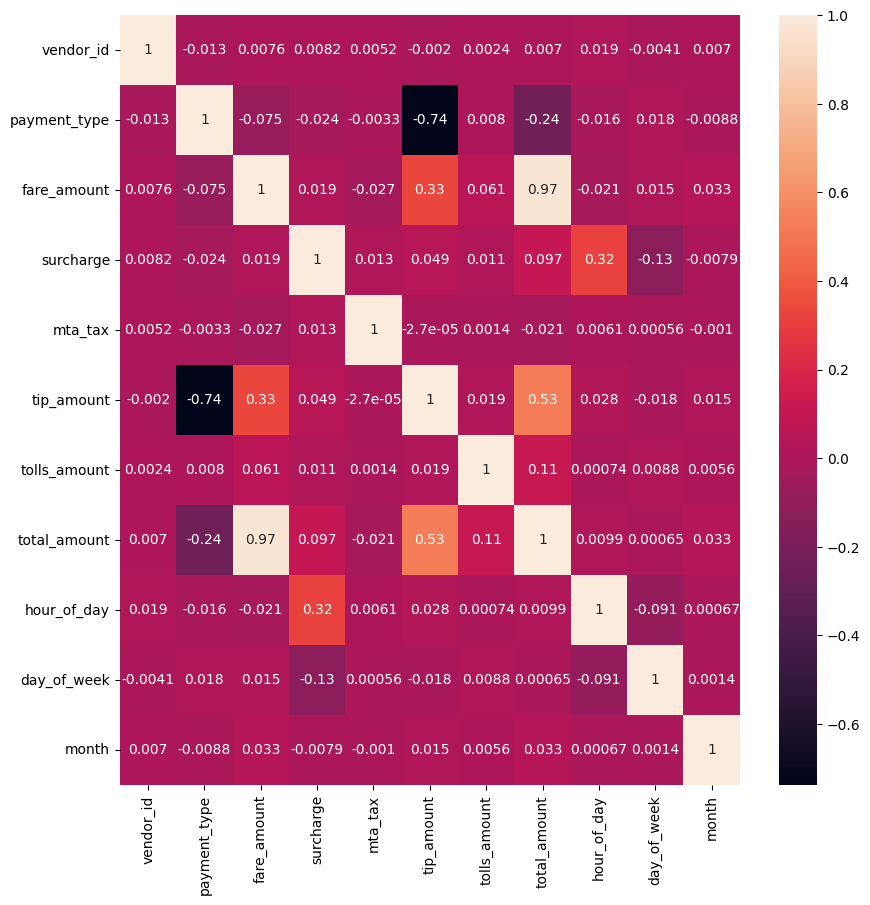

In [22]:
plt.figure(figsize=(10,10))
sns.heatmap(df3.corr(),annot=True)

In [23]:
x= df2.drop(columns=['total_amount','pickup_datetime'],axis = 1)
y =df2['total_amount']
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = .2,random_state=4)
x_train,x_test,y_train,y_test

(       vendor_id  payment_type  fare_amount  surcharge  mta_tax  tip_amount  \
 47800          0             1          8.0        0.0      0.5        0.00   
 29551          0             1         11.0        0.0      0.5        0.00   
 784            0             0          5.5        0.0      0.5        1.20   
 5707           0             1         13.5        0.0      0.5        0.00   
 6790           0             1         12.5        0.5      0.5        0.00   
 ...          ...           ...          ...        ...      ...         ...   
 25460          0             1         16.0        0.0      0.5        0.00   
 12870          1             0         16.0        0.0      0.5        2.00   
 29576          0             0          6.5        0.5      0.5        2.88   
 9077           0             0          6.5        0.5      0.5        1.00   
 19050          1             0          6.0        0.5      0.5        1.30   
 
        tolls_amount  hour_of_day  day

In [24]:
model = DecisionTreeRegressor()
model.fit(x_train,y_train)

DecisionTreeRegressor()

In [25]:
y_pred = model.predict(x_test)
y_pred

array([12. , 18.6, 17. , ...,  9.1, 18. , 12.5])

In [26]:
mse= mean_squared_error(y_test,y_pred)
mse

0.045359040630818095

In [27]:
r2 = r2_score(y_test,y_pred)
r2

0.9983494498333542